In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [255]:
data = pd.read_csv('learningSet.csv')

C:\Users\Playtime\AppData\Local\Temp\ipykernel_22772\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [256]:
def num_cat_split(df):
    num_df = pd.DataFrame(df.select_dtypes(include='number'))
    cat_df = pd.DataFrame(df.select_dtypes(include='object'))
    return num_df, cat_df

num_df, cat_df = num_cat_split(data)

In [257]:
cat_df

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,XXXX,C2,27,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,XXXX,C1,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,XXXX,C3,30,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,XXXX,C1,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [258]:
#check null

In [259]:
null_counts = cat_df.isnull().sum()
print(null_counts)

OSOURCE       0
STATE         0
ZIP           0
MAILCODE      0
PVASTATE      0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 74, dtype: int64


In [260]:
cat_df.isnull().sum().value_counts()

0      73
132     1
dtype: int64

In [261]:
#drop list

In [262]:
drop_list = []
drop_list = ['OSOURCE', 'ZIP']
drop_list

['OSOURCE', 'ZIP']

In [263]:
#85% null

In [264]:
over_85_percent = cat_df.columns[cat_df.isnull().sum() > 0.85]
over_85_percent

Index(['GEOCODE2'], dtype='object')

In [265]:
combine_list = list(drop_list) + list(over_85_percent)
combine_list

['OSOURCE', 'ZIP', 'GEOCODE2']

In [266]:
drop_list = combine_list
drop_list

['OSOURCE', 'ZIP', 'GEOCODE2']

In [267]:
#remove columns

In [268]:
print(cat_df.columns)
print(cat_df.shape)


Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER',
       'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18',
       'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
       'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')
(95412, 74)


In [269]:
cat_df.drop(drop_list, axis=1, inplace=True)

In [270]:
print(cat_df.columns)
print(cat_df.shape)

Index(['STATE', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3',
       'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER', 'AGEFLAG',
       'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER',
       'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
       'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A'],
      dtype='object')
(95412, 71)


In [271]:
#categories gender

In [272]:
cat_df['GENDER'].unique()

array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

In [273]:
cat_df['GENDER'] = cat_df['GENDER'].fillna('F')

In [274]:
def clean_gender(x):
    if x not in ['F', 'M']:
        return 'Other'
    else:
        return x

In [275]:
cat_df['GENDER'] = cat_df['GENDER'].apply(clean_gender)

In [276]:
cat_df['GENDER'].unique()

array(['F', 'M', 'Other'], dtype=object)

In [277]:
#check null

In [278]:
null_percentages = num_df.isnull().sum() / len(num_df)
null_25 = null_percentages[null_percentages > 0.25]# * 100
null_25 = pd.DataFrame(null_25).reset_index()
null_25.columns = ['column_name', 'null_percentage']
null_25

,column_name,null_percentage
0,NUMCHLD,0.870184
1,WEALTH1,0.468830
2,MBCRAFT,0.553955
3,MBGARDEN,0.553955
4,MBBOOKS,0.553955
...,...,...
67,RAMNT_20,0.917327
68,RAMNT_21,0.900296
69,RAMNT_22,0.781233
70,RAMNT_23,0.917631


In [279]:
len(num_df.columns)

407

In [280]:
drop_num_col_drop = []
drop_num_col_drop += [col for col in num_df.columns if "ADATE_" in col]

In [281]:
num_df.drop(drop_num_col_drop, axis=1, inplace=True)

In [282]:
len(num_df.columns)

384

In [283]:
num_df.columns

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=384)

In [284]:
null_percentages = num_df.isnull().sum() / len(num_df)
null_25 = null_percentages[null_percentages > 0.25]# * 100
null_25 = pd.DataFrame(null_25).reset_index()
null_25.columns = ['column_name', 'null_percentage']
null_25

,column_name,null_percentage
0,NUMCHLD,0.870184
1,WEALTH1,0.468830
2,MBCRAFT,0.553955
3,MBGARDEN,0.553955
4,MBBOOKS,0.553955
...,...,...
56,RAMNT_20,0.917327
57,RAMNT_21,0.900296
58,RAMNT_22,0.781233
59,RAMNT_23,0.917631


In [285]:
list(num_df.columns)

['ODATEDW',
 'TCODE',
 'DOB',
 'AGE',
 'NUMCHLD',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'WEALTH2',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW1',
 'DW2',
 'DW3',
 

In [286]:
list(cat_df.columns)

['STATE',
 'MAILCODE',
 'PVASTATE',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'GENDER',
 'DATASRCE',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24',
 'RFA_2R',
 'RFA_2A',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A']

# Feature engineering 

In [287]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [288]:
#GEOCODE2 has already been dropped since over 85% null values

In [289]:
num_df['WEALTH1'].isnull().sum()

44732

In [290]:
num_df['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [291]:
#Instructions requires us to drop NaNs

In [292]:
#num_df['WEALTH1'] = num_df['WEALTH1'].dropna()
num_df.dropna(subset=['WEALTH1'], inplace=True)

In [293]:
num_df['WEALTH1'].value_counts(dropna=False)

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [294]:
#ADI

In [295]:
num_df['ADI'].value_counts(dropna=False)

13.0     3345
51.0     2628
65.0     1910
57.0     1537
197.0    1284
         ... 
601.0       1
139.0       1
145.0       1
161.0       1
140.0       1
Name: ADI, Length: 201, dtype: int64

In [296]:
num_df['ADI'].isnull().sum()

32

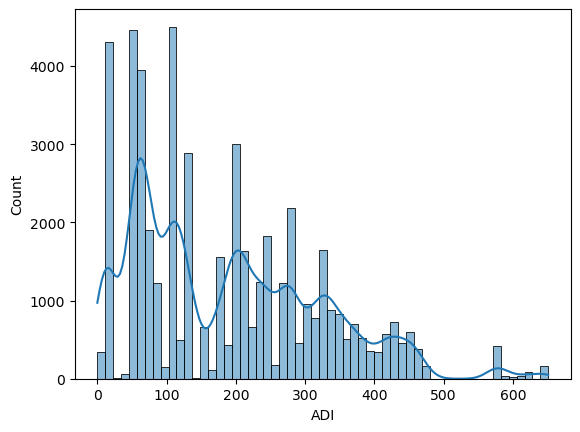

In [297]:
sns.histplot(num_df[num_df['ADI'].isna()==False]['ADI'],kde=True) 
plt.show()

In [298]:
np.median(num_df[num_df['ADI'].notna()]['ADI'])

175.0

In [299]:
num_df['ADI'].fillna(np.median(num_df[num_df['ADI'].notna()]['ADI']), inplace=True)

In [300]:
num_df['ADI'].isnull().sum()

0

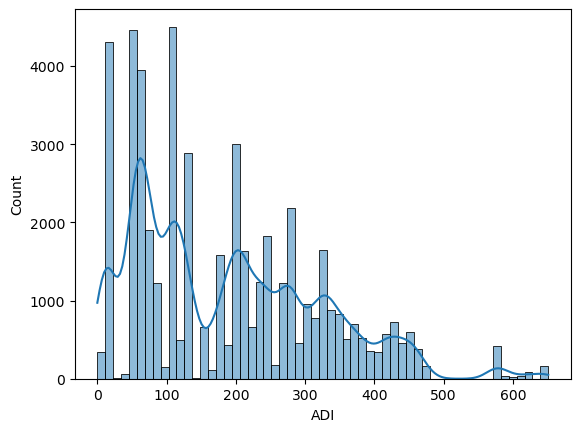

In [301]:
sns.histplot(num_df['ADI'], kde=True)
plt.show()

In [302]:
#DMA

In [303]:
num_df['DMA'].value_counts(dropna=False)

803.0    3345
602.0    2630
807.0    1910
505.0    1538
524.0    1285
         ... 
598.0       1
538.0       1
502.0       1
552.0       1
549.0       1
Name: DMA, Length: 202, dtype: int64

In [304]:
num_df['DMA'].isnull().sum()

32

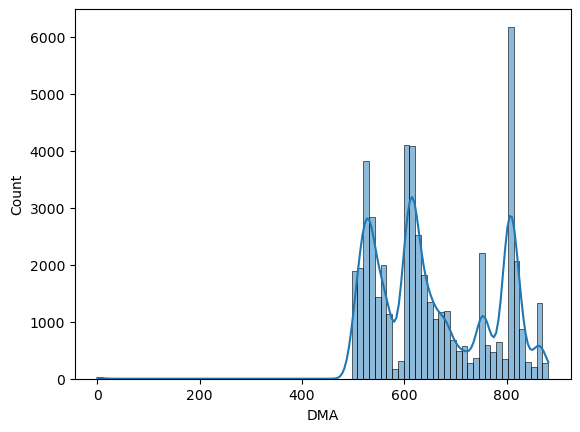

In [305]:
sns.histplot(num_df[num_df['DMA'].isna()==False]['DMA'],kde=True) 
plt.show()

In [306]:
np.mean(num_df[num_df['DMA'].notna()]['DMA'])

658.010365661033

In [307]:
round(np.mean(num_df[num_df['DMA'].notna()]['DMA']))

658

In [319]:
#np.median(num_df[num_df['DMA'].notna()]['DMA'])

625.0

In [309]:
num_df['DMA'].fillna(np.mean(num_df[num_df['DMA'].notna()]['DMA']), inplace=True)

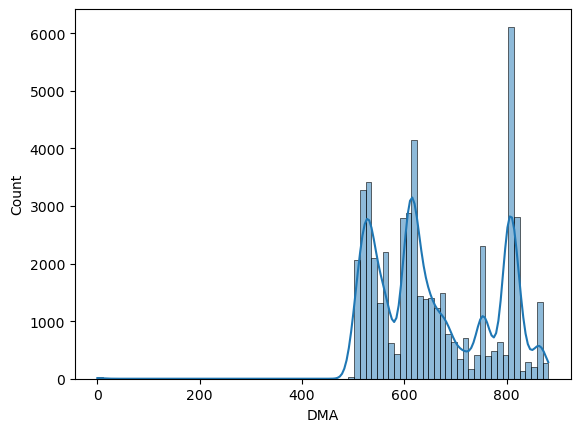

In [310]:
sns.histplot(num_df['DMA'], kde=True)
plt.show()

In [311]:
#MSA

In [312]:
num_df['MSA'].value_counts(dropna=False)

0.0       9734
1600.0    2307
4480.0    2185
2160.0    1381
520.0     1108
          ... 
1303.0       1
5523.0       1
743.0        1
1480.0       1
7610.0       1
Name: MSA, Length: 288, dtype: int64

In [313]:
num_df['MSA'].isnull().sum()

32

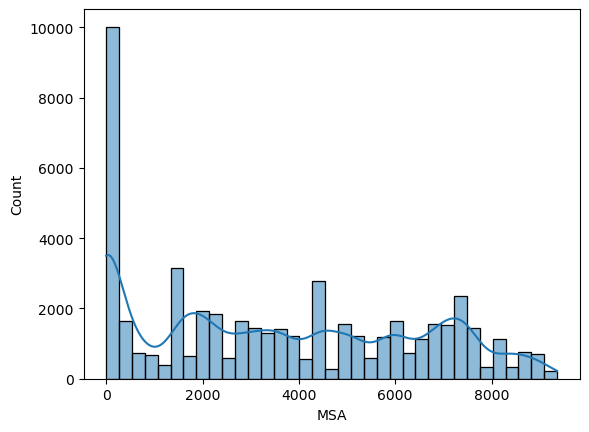

In [314]:
sns.histplot(num_df[num_df['MSA'].isna()==False]['MSA'],kde=True) 
plt.show()

In [315]:
np.mean(num_df[num_df['MSA'].notna()]['MSA'])

3599.3664507976623

In [316]:
np.median(num_df[num_df['MSA'].notna()]['MSA'])

3360.0

In [317]:
num_df['MSA'].fillna(np.median(num_df[num_df['MSA'].notna()]['MSA']), inplace=True)

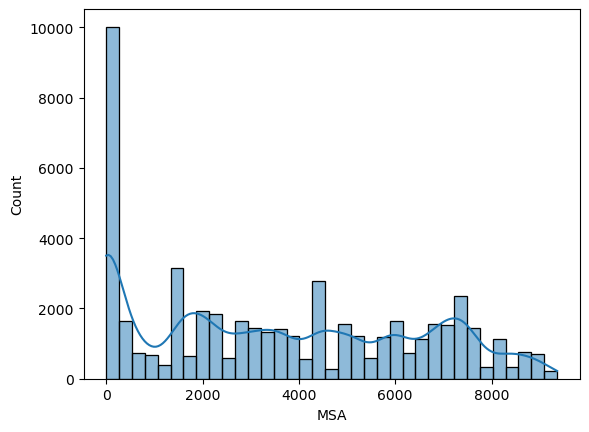

In [318]:
sns.histplot(num_df['MSA'], kde=True)
plt.show()

In [325]:
null_counts = num_df.isnull().sum().to_frame(name='null_count')
null_counts['null_percent'] = null_counts['null_count'] / len(num_df)
null_counts


,null_count,null_percent
ODATEDW,0,0.000000
TCODE,0,0.000000
DOB,0,0.000000
AGE,6655,0.131314
NUMCHLD,42342,0.835478
...,...,...
TARGET_B,0,0.000000
TARGET_D,0,0.000000
HPHONE_D,0,0.000000
RFA_2F,0,0.000000


In [328]:
null_percentages = num_df.isnull().sum() / len(num_df)
null = null_percentages[null_percentages > 0]# * 100
null = pd.DataFrame(null).reset_index()
null.columns = ['column_name', 'null_percentage']
null

,column_name,null_percentage
0,AGE,0.131314
1,NUMCHLD,0.835478
2,MBCRAFT,0.160260
3,MBGARDEN,0.160260
4,MBBOOKS,0.160260
...,...,...
59,RAMNT_23,0.919890
60,RAMNT_24,0.811148
61,NEXTDATE,0.096626
62,TIMELAG,0.096626


In [329]:
num_df.dropna(how='any', inplace=True)

In [332]:
null_percentages = num_df.isnull().sum() / len(num_df)
null = null_percentages[null_percentages > 0]# * 100
null = pd.DataFrame(null).reset_index()
null.columns = ['column_name', 'null_percentage']
null

,column_name,null_percentage


In [333]:
num_df.isnull().sum()

ODATEDW     0.0
TCODE       0.0
DOB         0.0
AGE         0.0
NUMCHLD     0.0
           ... 
TARGET_B    0.0
TARGET_D    0.0
HPHONE_D    0.0
RFA_2F      0.0
CLUSTER2    0.0
Length: 384, dtype: float64